<a href="https://colab.research.google.com/github/AnjaliTiwari-99/Employee-salary-prediction-/blob/main/MAIN_ML_Project(Anjali_msit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_excel('/content/dataset.xlsx')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
le = LabelEncoder()

In [ ]:
# Define categorical columns
categorical_cols = [
    "gender", "workclass", "marital-status", "occupation", "relationship",
    "race", "native-country", "education"
]

# Encode categorical columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Encode target column
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Save the encoders
import pickle
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [ ]:
scaler = StandardScaler()

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# (Optional) Save the scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Save the trained model
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [ ]:
# Get predicted probabilities for class 1 (i.e., P(y=1))
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.4 instead of default 0.5)
y_pred_xgb = (y_pred_proba > 0.45).astype(int)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

In [ ]:
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:\n", report_xgb)
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)

XGBoost Accuracy: 0.8734773262360528
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      7479
           1       0.74      0.72      0.73      2290

    accuracy                           0.87      9769
   macro avg       0.83      0.82      0.82      9769
weighted avg       0.87      0.87      0.87      9769

XGBoost Confusion Matrix:
 [[6892  587]
 [ 649 1641]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Get predicted probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Step 2: Convert to binary labels using threshold (e.g., 0.45)
y_pred = (y_pred_proba > 0.45).astype(int)

# Step 3: Now calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 0.12652267376394719
MAE: 0.12652267376394719
R² Score: 0.2949992730737768


MSE: 0.12652267376394719
MAE: 0.12652267376394719
R² Score: 0.2949992730737768

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      7479
           1       0.74      0.72      0.73      2290

    accuracy                           0.87      9769
   macro avg       0.83      0.82      0.82      9769
weighted avg       0.87      0.87      0.87      9769



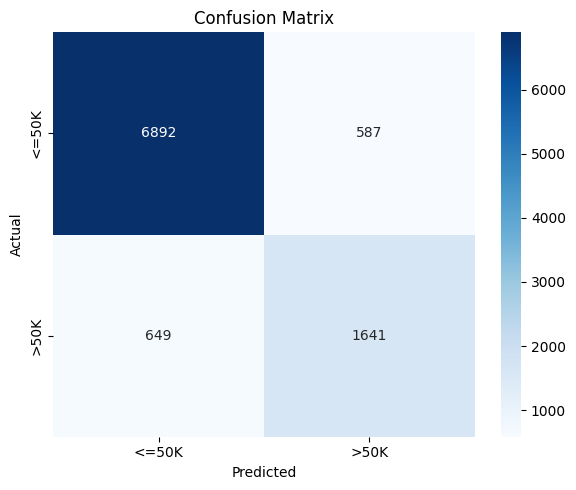

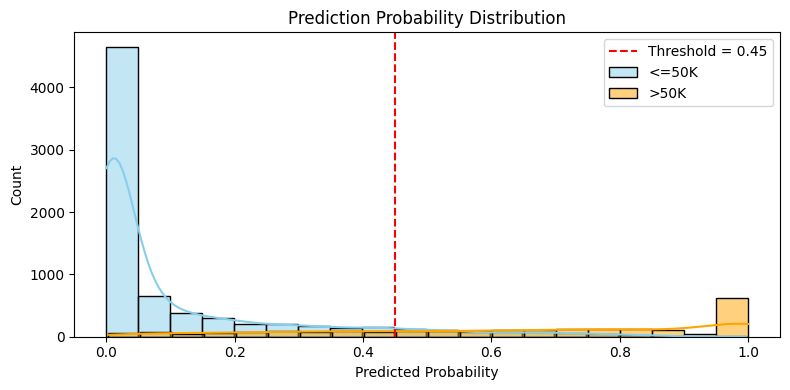

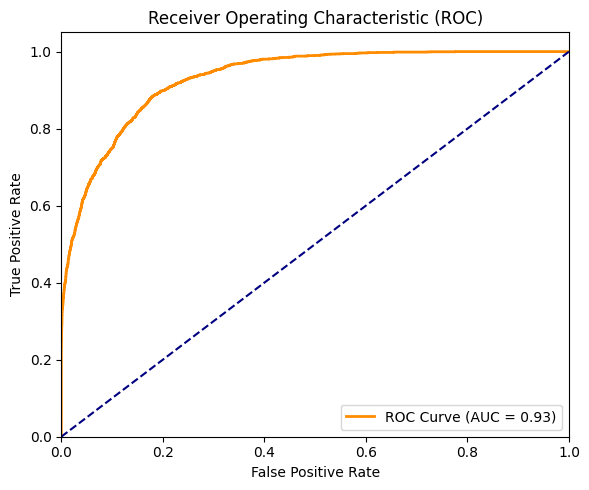

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Assuming you already have:
# y_pred_proba, y_test (actual), and set threshold
threshold = 0.45
y_pred = (y_pred_proba > threshold).astype(int)

# Step 1: Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 3: Probability Distribution
plt.figure(figsize=(8, 4))
sns.histplot(y_pred_proba[y_test == 0], bins=20, kde=True, color='skyblue', label='<=50K')
sns.histplot(y_pred_proba[y_test == 1], bins=20, kde=True, color='orange', label='>50K')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold = 0.45')
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


STREAMLIT

In [ ]:
from pyngrok import ngrok

# Replace with your ngrok authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("309I17h0PQWzVOd4s5Gl09UPqqa_2Kw7N9h9TvXw3zhK5v9BA")

In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load model, encoders, and scaler
with open('xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Title
st.title("Income Category Prediction")
st.subheader("Enter Individual's Information:")

# Category Mappings for UI dropdowns
category_mappings = {
    "gender": ['Male', 'Female'],
    "workclass": ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
    "marital-status": ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
    "occupation": ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?', 'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
                   'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
    "relationship": ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative'],
    "race": ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],
    "native-country": ['United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
                       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia',
                       'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal', 'China', 'Nicaragua', 'Honduras',
                       'Iran', 'Scotland', 'Jamaica', 'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago',
                       'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands'],
    "education": ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', 'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
                  '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
}

# Collect input features from user
user_inputs = {}

# Numeric fields
user_inputs["age"] = st.number_input("Age", min_value=0, max_value=100, value=30)
user_inputs["fnlwgt"] = st.number_input("fnlwgt", min_value=0, value=100000)
user_inputs["educational-num"] = st.number_input("Educational Number", min_value=0, max_value=20, value=10)
user_inputs["capital-gain"] = st.number_input("Capital Gain", min_value=0, value=0)
user_inputs["capital-loss"] = st.number_input("Capital Loss", min_value=0, value=0)
user_inputs["hours-per-week"] = st.number_input("Hours per Week", min_value=0, max_value=100, value=40)

# Encoded categorical fields
for feature, labels in category_mappings.items():
    label_to_index = {label: i for i, label in enumerate(labels)}
    selected_label = st.selectbox(f"{feature.replace('-', ' ').title()}", labels)
    user_inputs[feature] = label_to_index[selected_label]

# Predict button
if st.button("Predict Income Category"):
    # Arrange features in order used during training
    input_order = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
                   'occupation', 'relationship', 'race', 'gender', 'capital-gain',
                   'capital-loss', 'hours-per-week', 'native-country']

    input_array = np.array([user_inputs[feature] for feature in input_order]).reshape(1, -1)

    # Scale numerical features
    input_array_scaled = scaler.transform(input_array)

    # Predict probability and class
    y_pred_proba = model.predict_proba(input_array_scaled)[0][1]
    y_pred = int(y_pred_proba > 0.5)

    # Output
    label = ">50K" if y_pred == 1 else "<=50K"
    st.markdown(f"### Predicted Income Category: **{label}**")


# Optional: Show category mappings in sidebar
st.sidebar.title("Category Index Mappings")
for feature, labels in category_mappings.items():
    mapping_text = "\n".join([f"{i}: {label}" for i, label in enumerate(labels)])
    st.sidebar.markdown(f"**{feature.title()}**\n```\n{mapping_text}\n```")



2025-07-20 19:08:16.270 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 19:08:16.421 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-20 19:08:16.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 19:08:16.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 19:08:16.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 19:08:16.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 19:08:16.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 19:08:16.430 Thread 'MainThread': mi

In [ ]:
!curl https://loca.lt/mytunnelpassword

34.55.153.44

In [ ]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.55.153.44:8501

⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://few-wings-walk.loca.lt


In [ ]:
!pip install pyngrok streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
